In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df_train = pd.read_csv('train.csv')

In [3]:
df_train.shape

(381109, 12)

In [4]:
df_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [6]:
#dropping column of id and getting value counts for gender 
df_train.drop('id', axis=1, inplace=True)
df_train.Gender.value_counts()

Male      206089
Female    175020
Name: Gender, dtype: int64

In [7]:
# replace male with 0 and female with 1 
df_train.Gender.replace(to_replace = ['Male','Female'], value = [0,1], inplace=True)

In [8]:
#getting value counts for Vehicle age
df_train.Vehicle_Age.value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

In [9]:
df_train.Vehicle_Age.replace(to_replace = ['< 1 Year','> 2 Years'], value = [2,2], inplace=True)
df_train.Vehicle_Age.replace(to_replace = ['1-2 Year'], value = [1], inplace=True)

In [10]:
df_train.Vehicle_Age.value_counts()

1    200316
2    180793
Name: Vehicle_Age, dtype: int64

In [11]:
# replace male with 0 and female with 1 
df_train.Vehicle_Damage.replace(to_replace = ['No','Yes'], value = [0,1], inplace=True)

### Now checking outliers for : Age, Region code, Annual_Premium, Policy_Sales_Channel and Vintage

<AxesSubplot:xlabel='Age'>

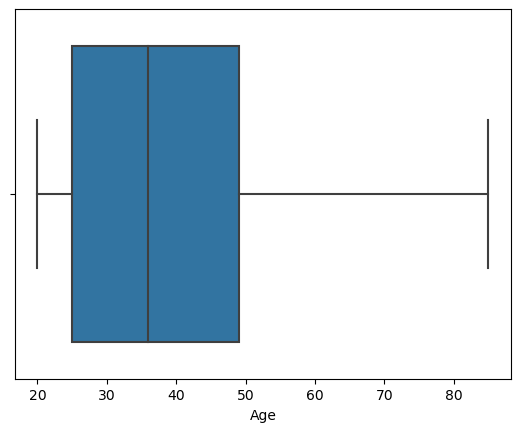

In [12]:
sns.boxplot(df_train['Age'])

<AxesSubplot:xlabel='Region_Code'>

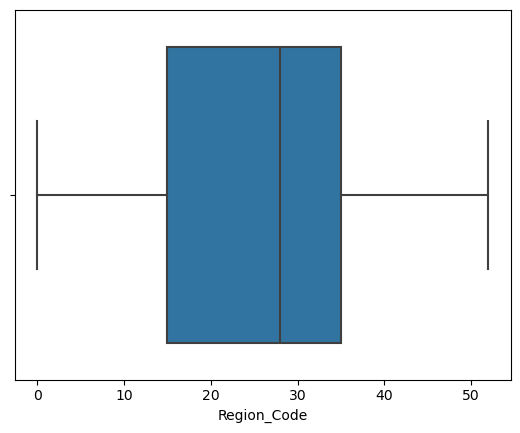

In [13]:
sns.boxplot(df_train['Region_Code'])

<AxesSubplot:xlabel='Annual_Premium'>

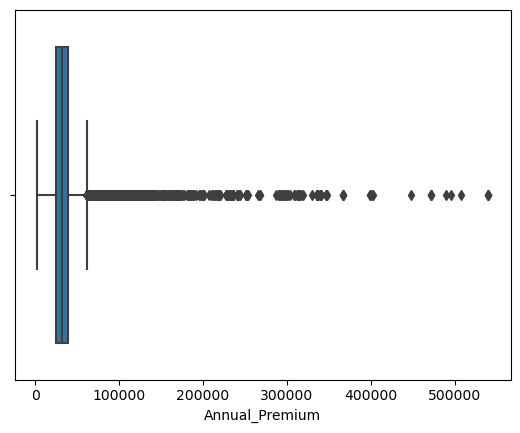

In [14]:
sns.boxplot(df_train['Annual_Premium'])

<AxesSubplot:xlabel='Policy_Sales_Channel'>

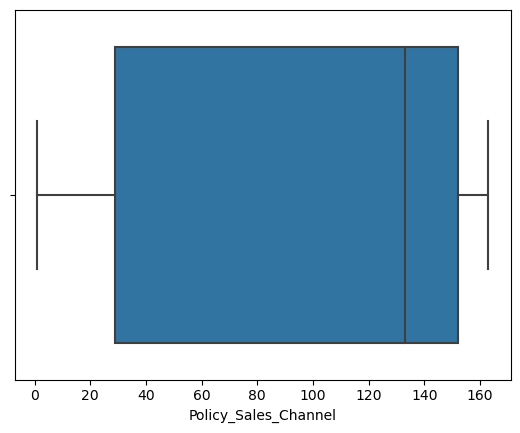

In [15]:
sns.boxplot(df_train['Policy_Sales_Channel'])

<AxesSubplot:xlabel='Vintage'>

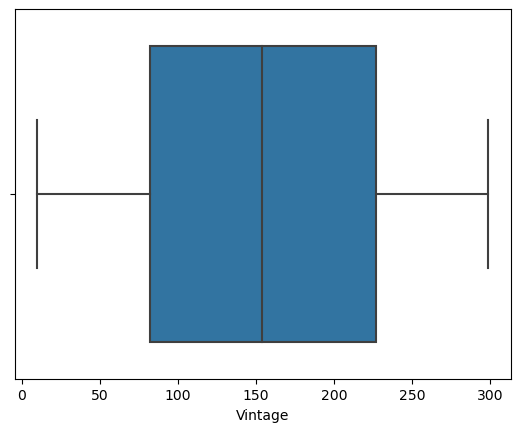

In [16]:
sns.boxplot(df_train['Vintage'])

#### outliers only exist in annual premium

In [17]:
def find_boundaries(df, variable, distance):
    Q1 =  df[variable].quantile(0.25)
    Q3 =  df[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_boundary = Q1 - (IQR * distance)
    upper_boundary = Q3 + (IQR * distance)
    return upper_boundary, lower_boundary

In [18]:
AP_UB, AP_LB = find_boundaries(df_train,'Annual_Premium',1.5)
AP_UB, AP_LB

(61892.5, 1912.5)

In [19]:
#creating a Boolean vector to flag the outliers in Annual_Premium
outliers_Annual_Premium = np.where(df_train['Annual_Premium'] > AP_UB, True,
                                   np.where(df_train['Annual_Premium'] < AP_LB, True,False))

In [20]:
df_train.shape #checking shape of df

(381109, 11)

In [21]:
df_train['Annual_Premium'][outliers_Annual_Premium].count()   # counting the outlier

10320

In [22]:
df_train['AP_alt_trim'] = df_train.Annual_Premium[(df_train.Annual_Premium < AP_UB) & (df_train.Annual_Premium > AP_LB)]  # This is to the trim the outliers

In [23]:
df_train

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,AP_alt_trim
0,0,44,1,28.0,0,2,1,40454.0,26.0,217,1,40454.0
1,0,76,1,3.0,0,1,0,33536.0,26.0,183,0,33536.0
2,0,47,1,28.0,0,2,1,38294.0,26.0,27,1,38294.0
3,0,21,1,11.0,1,2,0,28619.0,152.0,203,0,28619.0
4,1,29,1,41.0,1,2,0,27496.0,152.0,39,0,27496.0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,0,74,1,26.0,1,1,0,30170.0,26.0,88,0,30170.0
381105,0,30,1,37.0,1,2,0,40016.0,152.0,131,0,40016.0
381106,0,21,1,30.0,1,2,0,35118.0,160.0,161,0,35118.0
381107,1,68,1,14.0,0,2,1,44617.0,124.0,74,0,44617.0


In [24]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  int64  
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  int64  
 6   Vehicle_Damage        381109 non-null  int64  
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
 11  AP_alt_trim           370789 non-null  float64
dtypes: float64(4), int64(8)
memory usage: 34.9 MB


In [25]:
df_train.dropna(inplace=True)

# Machine Learning

### Making Logistic Regression Model

In [26]:
df_train.Response.value_counts()

0    325634
1     45155
Name: Response, dtype: int64

In [27]:
X = df_train.drop('Response', axis=1)
Y = df_train['Response']

In [28]:
trainX, testX, trainY, testY = train_test_split(X,Y, test_size=0.3, random_state=12)
modelLogR = LogisticRegression(max_iter=1000)     # object
modelLogR.fit(trainX,trainY)
preLogR = modelLogR.predict(testX)
accuracy_score(preLogR,testY)

0.8794106277587493

### Performance measurement

In [29]:
print(classification_report(testY,preLogR))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     97849
           1       0.12      0.00      0.00     13388

    accuracy                           0.88    111237
   macro avg       0.50      0.50      0.47    111237
weighted avg       0.79      0.88      0.82    111237



### Applying Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier 

In [31]:
modelRF = RandomForestClassifier()

In [32]:
modelRF.fit(trainX,trainY)

RandomForestClassifier()

In [33]:
predRF_test = modelRF.predict(testX)

In [34]:
accuracy_score(testY,predRF_test)

0.8703219252586819

In [35]:
predRF_train=modelRF.predict(trainX)

In [36]:
accuracy_score(trainY,predRF_train)

0.9998497410923437

In [37]:
print(classification_report(testY,predRF_test))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93     97849
           1       0.37      0.11      0.17     13388

    accuracy                           0.87    111237
   macro avg       0.63      0.54      0.55    111237
weighted avg       0.83      0.87      0.84    111237



In [38]:
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score

In [39]:
#kf = KFold(n_splits=3, random_state=42, shuffle=True)
Skf = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

In [40]:
#scores_cv1 = cross_val_score(modelRF,X, Y, scoring='accuracy', cv=kf, n_jobs=-1)

scores_skf = cross_val_score(modelRF, X, Y, scoring='accuracy', cv=Skf, n_jobs=-1)

In [41]:
scores_skf

array([0.86892886, 0.86837762, 0.86779507])

In [43]:
np.mean(scores_skf)

0.8683671830564702

In [ ]:
kf = KFold(n_splits=3, random_state=42, shuffle=True)
scores_cv1 = cross_val_score(modelRF,X, Y, scoring='accuracy', cv=kf, n_jobs=-1)
scores_cv1

In [ ]:
np.mean(scores_cv1)